In [12]:
import warnings
import matplotlib.pyplot as plt
import time
warnings.filterwarnings("ignore", category=UserWarning)
from load import WESAD
import pandas as pd
import feature as feat

In [13]:
wesad,fs =  WESAD(),7500
ecg_signal = wesad.df['ECG'][:fs]

Finished building DataFrame


In [14]:
rolling_data = wesad.rolling_window(ecg_signal,window_size=7000)

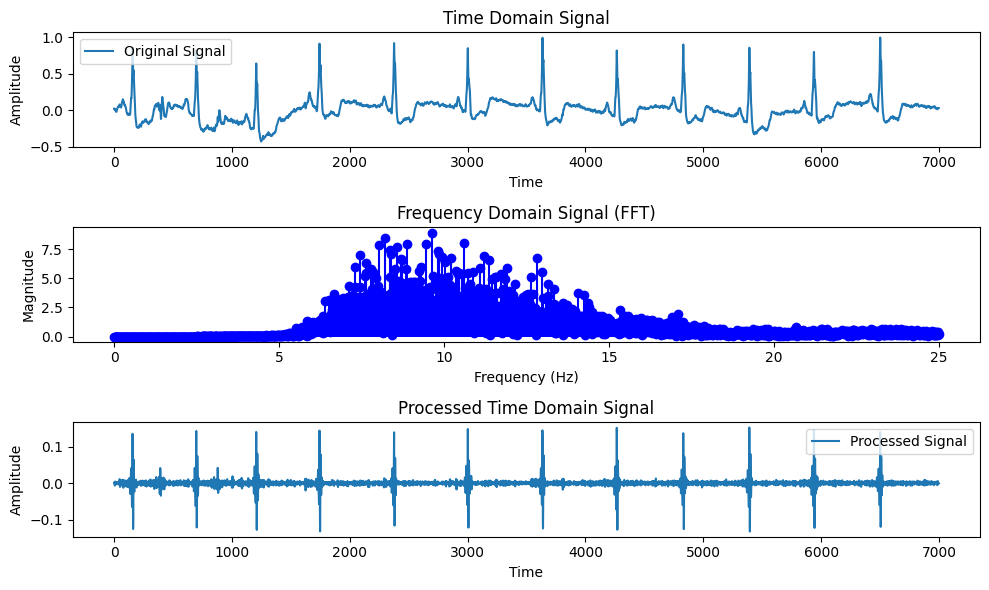

In [15]:
time_signal = rolling_data[0]
decorator = feat.SignalDecorator(time_signal)
decorator.add_processor(feat.ButterBandpass(), lowcut=5, highcut=30, fs=70)
decorator.add_processor(feat.FFTProcessor())
processed_signal, results = decorator.apply()
# 繪圖
visualizer = feat.SignalVisualizer(time_signal, time_step=1/len(time_signal))
visualizer.plot(processed_signal, results)

In [16]:
limit = 100

In [17]:
from load import Evaluate

In [18]:
works = [x for x in range(1,21,5)]

In [19]:
works

[1, 6, 11, 16]

signal length: 5000/5001
multi thread use 1 works


d:\_study\DataScience\EdgeAI\feature.py:169: RuntimeWarning: invalid value encountered in double_scalars
  energies[f"{band}_normalized"] = energies[band] / total_power


signal length: 5000/5001
multi thread use 6 works


d:\_study\DataScience\EdgeAI\feature.py:169: RuntimeWarning: invalid value encountered in double_scalars
  energies[f"{band}_normalized"] = energies[band] / total_power


signal length: 5000/5001
multi thread use 11 works


d:\_study\DataScience\EdgeAI\feature.py:169: RuntimeWarning: invalid value encountered in double_scalars
  energies[f"{band}_normalized"] = energies[band] / total_power


signal length: 5000/5001
multi thread use 16 works


d:\_study\DataScience\EdgeAI\feature.py:169: RuntimeWarning: invalid value encountered in double_scalars
  energies[f"{band}_normalized"] = energies[band] / total_power


        time  works
0  26.028406      1
1  30.328292      6
2  30.217918     11
3  30.265371     16


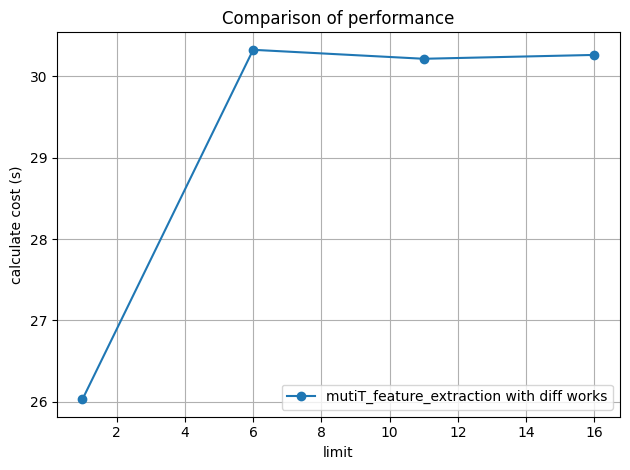

In [20]:
Evaluate.with_diff_work(wesad,works,limit=5000)
Evaluate.show()

signal length: 10
signal length: 10/5001
multi thread use 10 works
{'limit': [10], 'feature_extraction_time': [28.411208629608154], 'mutiT_feature_extraction_time': [8.397393703460693]}
signal length: 20
signal length: 20/5001
multi thread use 10 works
{'limit': [10, 20], 'feature_extraction_time': [28.411208629608154, 52.94387936592102], 'mutiT_feature_extraction_time': [8.397393703460693, 8.695297241210938]}
signal length: 30
signal length: 30/5001
multi thread use 10 works
{'limit': [10, 20, 30], 'feature_extraction_time': [28.411208629608154, 52.94387936592102, 77.74834942817688], 'mutiT_feature_extraction_time': [8.397393703460693, 8.695297241210938, 8.825684785842896]}
   limit  feature_extraction_time  mutiT_feature_extraction_time
0     10                28.411209                       8.397394
1     20                52.943879                       8.695297
2     30                77.748349                       8.825685


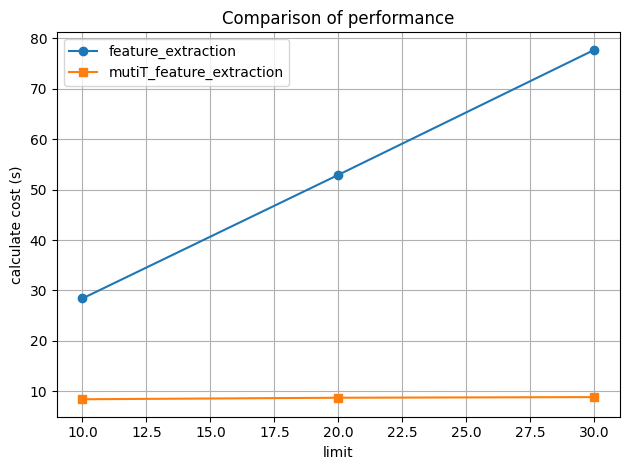

In [21]:

# 假設 wesad 是一個已存在的物件，且包含兩個特徵提取函數
# 如果還沒有實際代碼，我們可以模擬這些函數的行為

# 定義不同的 limit 值
Evaluate.with_row_limit(wesad,[10,20,30])
Evaluate.show()